<a href="https://colab.research.google.com/github/GaneshiUmayangana/Logistic_Gradient_Descent/blob/main/Logistic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Simulate a dataset
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 1)  # One independent variable
Y = (X[:, 0] > 0).astype(int).reshape(-1, 1)  # Generate labels: 1 if X > 0, else 0


In [3]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# Binary cross-entropy loss
def compute_loss(y, y_pred):
    m = len(y)
    return -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [5]:
# Gradient descent algorithm
def gradient_descent(X, Y, learning_rate, num_iterations):
    m, n = X.shape
    W = np.zeros((n, 1))
    B = 0  # Initialize bias
    losses = []  # To store loss at each iteration

    for i in range(num_iterations):
        # Compute the linear combination of inputs and weights
        z = np.dot(X, W) + B
        # Apply the sigmoid function to get predictions
        h = sigmoid(z)

        # Compute the gradient
        dW = (1/m) * np.dot(X.T, (h - Y))
        dB = (1/m) * np.sum(h - Y)

        # Update the parameters
        W -= learning_rate * dW
        B -= learning_rate * dB

        # Compute the loss
        loss = compute_loss(Y, h)
        losses.append(loss)

        if i % (num_iterations // 10) == 0:
            print(f"Cost after iteration {i}: {loss}")

    return W, B, losses

In [6]:
# Parameters
learning_rate = 0.0015
num_iterations = 100000

In [7]:
# Run gradient descent
W, B, losses = gradient_descent(X, Y, learning_rate, num_iterations)


Cost after iteration 0: 0.6931471805599453
Cost after iteration 10000: 0.23805932640967445
Cost after iteration 20000: 0.18230265901003265
Cost after iteration 30000: 0.15569469262297733
Cost after iteration 40000: 0.1390429794079859
Cost after iteration 50000: 0.12725867321217516
Cost after iteration 60000: 0.118306600436687
Cost after iteration 70000: 0.11118409556867656
Cost after iteration 80000: 0.10532918967841225
Cost after iteration 90000: 0.10039784318100342


In [8]:
# Results
print("Estimated parameters (weights):", W)
print("Estimated bias:", B)


Estimated parameters (weights): [[6.27544112]]
Estimated bias: 0.4090257157784096


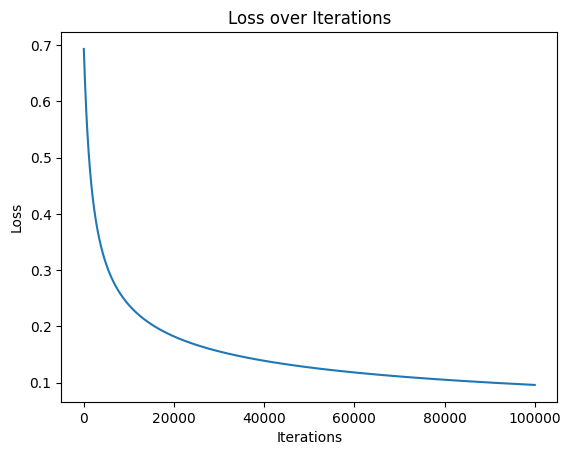

In [9]:
# Plot the loss over iterations
import matplotlib.pyplot as plt

plt.plot(range(num_iterations), losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()